# Credit Card Customer Churn Analysis and Prediction

In simple terms 'Customer Churn' is the fraction of customers that stopped using your company's product or service during a certain period of time. The churn rate is an important metric companies use to know how they stand as regards customer retention. The churn rate is calculated by dividing the number of customers a company lost during a specific time period - say a month, by the number of customers at the beginning of the time frame. 

In this project, I ran exploratory data analysis on the given data set to visualize and get a sense of the general trends in product usage and customer demographics. Also, I wrote a predictive model to help accurately determine what data points are critical to customer churn and profer solutions on how the business can reduce churn and ultimately card renewals.

Hope you enjoy going through this, half as much as I enjoyed working on it.

The data set was gotten from Kaggle and the credit card company details remain undisclosed. This project was part of the final project delivery for the ZeroToPandas course by Jovian. [Data Analysis with Python: Zero to Pandas](zerotopandas.com), and what you've learned from it.

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

The data set used for this project was downloaded from Kaggle using the [`opendatasets`](https://github.com/JovianML/opendatasets#opendatasets) python library. If you would like to also get this dataset into your jupyter notebook and run analyses of your own, kindly follow these steps:

**1.** Install and import the opendatasets library as shown below. <br>
**2.** Signup/login to your Kaggle account. Click on the profile image at the top right corner of the page. Click on account and navigate to "Create New API Token". <br>
**3.** Once you click on "Create New API Token", a Kaggle.json file would be downloaded.  <br>
**4.** After the file is downloaded, it has to be stored on the jupyter directory. To do this, open up jupyter (locally or on your browser), click on File >> Open. Once the directory opens up, click on "Upload" to import the Kaggle.json file. <br>
**5.** Copy the web link to the dataset you want to download on Kaggle. <br>
**6.** Pass the copied link as an argument in the opendatasets.download() method to download and extract the dataset. <br>
**7.** When ruinning `opendatasets.download()`, you would be prompted to input your Kaggle username and key. This can be found by opening the .json file just uploaded to the jupyter directory. <br>
**8.** You are all set!

In [ ]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [ ]:
dataset_url = 'https://www.kaggle.com/sakshigoyal7/credit-card-customers' 

In [ ]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./credit-card-customers" (use force=True to force download)


The dataset has been downloaded and extracted.

In [ ]:
data_dir = './credit-card-customers'

In [ ]:
import os
os.listdir(data_dir)

['BankChurners.csv']

Let us save and upload our work to Jovian before continuing.

In [ ]:
project_name = "credit-card-churn-analysis" 

In [ ]:
!pip install jovian --upgrade -q

In [ ]:
import jovian

In [ ]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...


[jovian] Error: Looks like the notebook is missing output cells, please save the notebook and try jovian.commit again.


Committed successfully! https://jovian.ai/solomon-ayanlakin/credit-card-churn-analysis


'https://jovian.ai/solomon-ayanlakin/credit-card-churn-analysis'

## Data Preparation and Cleaning

Importing the pandas as pd and loading the data set into a data frame. I also made use of some pandas methods to have a wholistic view on the dataset. 



In [ ]:
%pylab
import pandas as pd

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


In [ ]:
bank_churn_df = pd.read_csv(data_dir + '/BankChurners.csv')

Displaying the first 5 rows of the dataset using `.head()` method and formatting the display using `.style.set_properties()`. This allows us set the background color, font size, font color and more for the output.

In [ ]:
bank_churn_df.head().style.set_properties(**{"background-color": "black","color": "white", "border-color": "white","font-size":"10pt",'width': 250})

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000000,777,11914.000000,1.335000,1144,42,1.625000,0.061000,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000000,864,7392.000000,1.541000,1291,33,3.714000,0.105000,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000000,0,3418.000000,2.594000,1887,20,2.333000,0.000000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.000000,2517,796.000000,1.405000,1171,20,2.333000,0.760000,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000000,0,4716.000000,2.175000,816,28,2.500000,0.000000,0.000022,0.999980


In [ ]:
bank_churn_df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [ ]:
# To show a summary of each column: Datatype and non-null column count, we make use of the .info method
bank_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [ ]:
# To have a glance of all the columns 
bank_churn_df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [ ]:
# To get a statistical summary of all columns, we would be making use of the .describe method

bank_churn_df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [ ]:
#Checking for missing/null data entries
bank_churn_df.isnull() #This returns a boolean for every entry in the dataframe. Displaying True if there is a null entry and False otherwise.

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10123,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10124,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10125,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#The above entry can be somewhat confusing and null values can be missed. We can however group this search by columns to see if there are any null entries in a column

bank_churn_df.columns.isnull() 

#This returns a arrray of bool values with length equal to the number of columns in the original data frame.

# It's easier for me to see if there are any null values in a column this way

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [ ]:
#To count the number of null values in a given column, we can add the .sum() method to our previous code.

bank_churn_df[bank_churn_df.columns].isnull().sum().sort_values(ascending = False) 

#Seeing that there are no missing values, we do not need to make any major cleaning changes to the data frame.

CLIENTNUM                                                                                                                             0
Contacts_Count_12_mon                                                                                                                 0
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1    0
Avg_Utilization_Ratio                                                                                                                 0
Total_Ct_Chng_Q4_Q1                                                                                                                   0
Total_Trans_Ct                                                                                                                        0
Total_Trans_Amt                                                                                                                       0
Total_Amt_Chng_Q4_Q1                            

In [ ]:
#Searching for duplicate entries in the dataset
bank_churn_df[bank_churn_df.duplicated()] #There are no duplicate entries. 

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2


In [ ]:
#Seeing that the first column (Client Number) and the last two columns are irrelivant to our analysis, we can drop them.
bank_churn_df = bank_churn_df.iloc[:,1:-2]

In [ ]:
bank_churn_df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [ ]:
import jovian

In [246]:
jovian.commit() #Saving a snapshot of my work to Jovian.

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/solomon-ayanlakin/credit-card-churn-analysis


'https://jovian.ai/solomon-ayanlakin/credit-card-churn-analysis'

## Exploratory Analysis and Visualization

All entries in a data sets are divided into two main data types, numerical and categorical data. To make our exploratory analysis much simpler, I would be dividing the columns into these two types.

**Numerical Data:** Numerical data is that which can be counted, for example, weights, number of days in the week, etc. and can be further classified under two types, discrete and continuous data. 

**Categorical/Qualitative Data:** This on the other usually represents data that cannot be numerically counted. For example: gender, country, etc. There are also sub divided into nominal and ordinal data. 



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**Numerical Data:** Looking at the data types, numerical are those which are not objects, they are either of the data type int, or float. Hence to isolate numerical columns, I would be filtering out columns witih data type 'O' (which represents objects in python)

In [ ]:
num_data = [num for num in bank_churn_df.columns if bank_churn_df[num].dtypes != 'O'] 
#!= 'O' is used to pick out the columns whose datatypes are not objects. This leaves out all floats and integers, which are numerical values

In [ ]:
num_data

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

**Categorical Data:** To isolate categorical columns, I would be filtering for columns with data type == 'O'.

In [ ]:
cat_data = [cat for cat in bank_churn_df.columns if bank_churn_df[cat].dtypes == 'O'] 

In [ ]:
cat_data

['Attrition_Flag',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

**Exploring Numerical Columns**

In [ ]:
#Basic Statistics on only numerical columns.
round(bank_churn_df.describe(exclude = 'object'), 2)

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00
mean,46.33,2.35,35.93,3.81,2.34,2.46,8631.95,1162.81,7469.14,0.76,4404.09,64.86,0.71,0.27
std,8.02,1.30,7.99,1.55,1.01,1.11,9088.78,814.99,9090.69,0.22,3397.13,23.47,0.24,0.28
min,26.00,0.00,13.00,1.00,0.00,0.00,1438.30,0.00,3.00,0.00,510.00,10.00,0.00,0.00
25%,41.00,1.00,31.00,3.00,2.00,2.00,2555.00,359.00,1324.50,0.63,2155.50,45.00,0.58,0.02
50%,46.00,2.00,36.00,4.00,2.00,2.00,4549.00,1276.00,3474.00,0.74,3899.00,67.00,0.70,0.18
75%,52.00,3.00,40.00,5.00,3.00,3.00,11067.50,1784.00,9859.00,0.86,4741.00,81.00,0.82,0.50
max,73.00,5.00,56.00,6.00,6.00,6.00,34516.00,2517.00,34516.00,3.40,18484.00,139.00,3.71,1.00


**Exploring Categorical Columns**

In [ ]:
#Basic Statistics on Categorical Columns
round(bank_churn_df.describe(exclude = ['float', 'int64']), 2)

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


**Exploring the Attrition Column** - Attrition shows which customers have churned or not.

In [ ]:
# Looking at a distinct count of the Attrition flag column.
bank_churn_df['Attrition_Flag'].value_counts() 

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  after removing the cwd from sys.path.
No handles with labels found to put in legend.


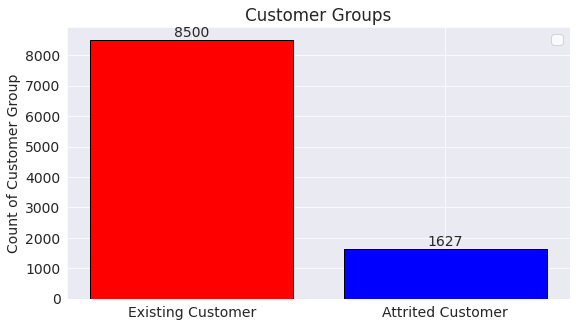

In [ ]:
plt.bar(bank_churn_df.Attrition_Flag.unique(), 
        bank_churn_df['Attrition_Flag'].value_counts(), 
        color = 'rb', 
        edgecolor = 'k')
# bank_churn_df.Attrition_Flag.unique() ### This line of code in the plt.bar() function was used as the x-axis of the plot. It picks out the Attition flag column and displays the unique values. 
# bank_churn_df['Attrition_Flag'].value_counts() ### This was to count the number of unique values in the Attrition Flag column, and was used as the values for the y-axis.

# Styling
plt.ylabel('Count of Customer Group') 
plt.title('Customer Groups')
sns.set_style('whitegrid')
plt.legend()
# Annotating the Plot
y_axis = bank_churn_df['Attrition_Flag'].value_counts()
x_axis = bank_churn_df.Attrition_Flag.unique()
for i in range(len(y_axis)):  
    plt.annotate(str(y_axis[i]), xy=(x_axis[i],y_axis[i]), ha='center', va='bottom')

**Analyzing Customer Age**

In [ ]:
bank_churn_df['Age_bin'] = 0 # Creating a new column in the data frame and populating it with zero

bank_churn_df.loc[(bank_churn_df.Customer_Age>25)&(bank_churn_df.Customer_Age<=35), 'Age_bin'] = 0
bank_churn_df.loc[(bank_churn_df.Customer_Age>35)&(bank_churn_df.Customer_Age<=45), 'Age_bin'] = 1
bank_churn_df.loc[(bank_churn_df.Customer_Age>45)&(bank_churn_df.Customer_Age<=55), 'Age_bin'] = 2
bank_churn_df.loc[(bank_churn_df.Customer_Age>55)&(bank_churn_df.Customer_Age<=65), 'Age_bin'] = 3
bank_churn_df.loc[bank_churn_df.Customer_Age>65, 'Age_bin'] = 4
#bank_churn_df['Age_bin'] = bank_churn_df['Age_bin'].astype(int)


In [ ]:
bank_churn_df['Age_bin'].value_counts()

2    4135
1    3742
3    1321
0     919
4      10
Name: Age_bin, dtype: int64

In [ ]:
bank_churn_df['Age_bin'].value_counts().index

Int64Index([2, 1, 3, 0, 4], dtype='int64')

In [ ]:
list(bank_churn_df['Age_bin'].value_counts())

[4135, 3742, 1321, 919, 10]

In [ ]:
import seaborn as sns

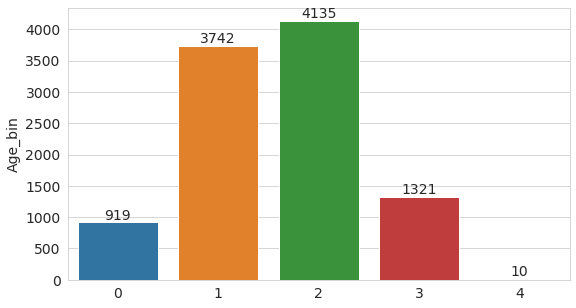

In [ ]:
sns.barplot(x=bank_churn_df['Age_bin'].value_counts().index,y=bank_churn_df['Age_bin'].value_counts())

xaxis = bank_churn_df['Age_bin'].value_counts().index
yaxis = list(bank_churn_df['Age_bin'].value_counts())

# Annotating the plot
for i in range(len(yaxis)):  
    plt.annotate(str(yaxis[i]), xy=(xaxis[i],yaxis[i]), ha='center', va='bottom')

### Income Category Analysis
Looking at the income category by Gender

In [ ]:
bank_churn_df['Counter'] = 1

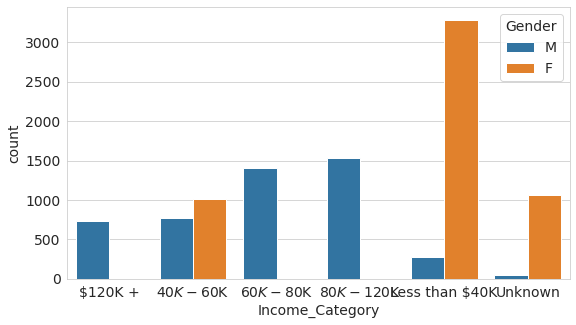

In [ ]:
df = bank_churn_df[['Income_Category', 'Gender', 'Counter']]
df

# perform groupby
df = df.groupby(['Income_Category', 'Gender']).agg(count=("Counter", 'sum'))
df = df.reset_index() 

# plot barplot
sns.barplot(x="Income_Category",
           y="count",
           hue="Gender",
           data=df)

### **Analyzing Gender Distribution**

In [ ]:
bank_churn_df['Gender'].value_counts().sort_values(ascending = True)

M    4769
F    5358
Name: Gender, dtype: int64

In [ ]:
bank_churn_df['Gender'].unique()

array(['M', 'F'], dtype=object)

Text(0.5, 1.0, 'Gender Distribution')

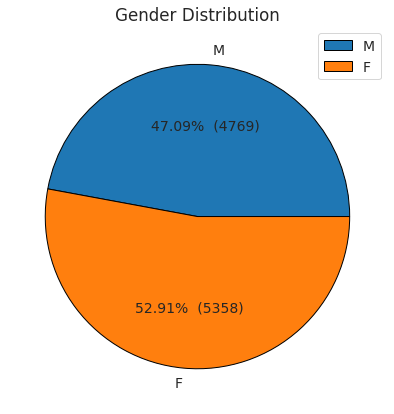

In [ ]:
plt.figure(figsize=(7, 7))

# Using the unique values in the 'Gender' column as the labels.
label = bank_churn_df['Gender'].unique()
data = bank_churn_df['Gender'].value_counts().sort_values(ascending = True)


# Annotating the Pie chart to show the percentage as well as the values of each wedge
def make_autopct(data):
    def autopct(pct):
        total = sum(data)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return autopct

# Specifying the width and color of the outline
wp = { 'linewidth' : 1, 
      'edgecolor' : "black" 
      }

plt.pie(data, 
        labels = label, 
        wedgeprops = wp,
        autopct=make_autopct(data)
        )

# Legend and Title
plt.legend()
plt.title('Gender Distribution')

Let us save and upload our work to Jovian before continuing

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...


[jovian] Error: Looks like the notebook is missing output cells, please save the notebook and try jovian.commit again.


Committed successfully! https://jovian.ai/solomon-ayanlakin/credit-card-churn-analysis


'https://jovian.ai/solomon-ayanlakin/credit-card-churn-analysis'

### **Analyzing Education Level**

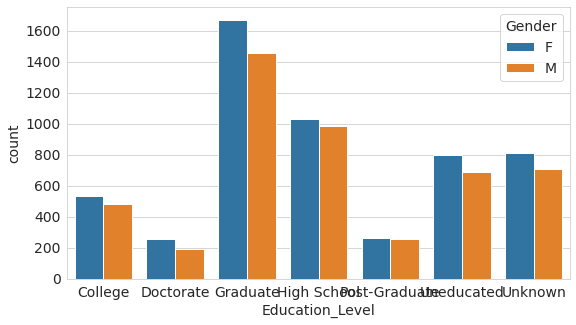

In [ ]:
df = bank_churn_df[['Education_Level', 'Gender', 'Counter']]
df

# perform groupby
df = df.groupby(['Education_Level', 'Gender']).agg(count=("Counter", 'sum'))
df = df.reset_index() 

# plot barplot
sns.barplot(x="Education_Level",
           y="count",
           hue="Gender",
           data=df)

**Scatter Plot of Transaction Amount and Credit Limit**
Looking at a scatter plof of Total transaction amount against the credit limit issued. 

We clearly see that males are generally given a higher credit limit

Text(0.5, 1.0, 'Credit Limit VS. Total Transaction Amount')

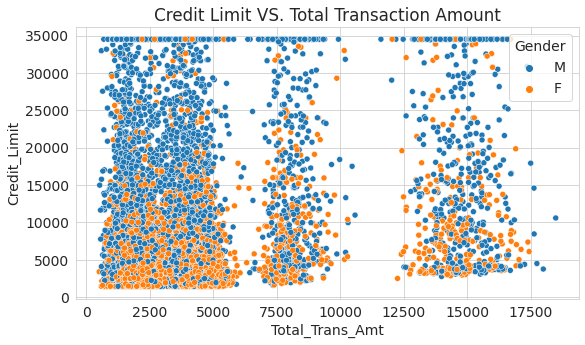

In [ ]:
x=sns.scatterplot(x="Total_Trans_Amt",
                y="Credit_Limit",
                data=bank_churn_df,
                hue= "Gender"
                )

x.set_title("Credit Limit VS. Total Transaction Amount")

In [ ]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...


[jovian] Error: Looks like the notebook is missing output cells, please save the notebook and try jovian.commit again.


Committed successfully! https://jovian.ai/solomon-ayanlakin/credit-card-churn-analysis


'https://jovian.ai/solomon-ayanlakin/credit-card-churn-analysis'

## Asking and Answering Questions



#### Q1: Who are the top 10 customers with the highest credit limit.



In [232]:
bank_churn_df.sort_values(["Credit_Limit"], ascending=False).iloc[0:10, :]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Age_bin,Counter
7032,Existing Customer,45,M,3,Graduate,Single,$60K - $80K,Silver,34,5,1,1,34516.0,1664,32852.0,0.730,4912,80,0.739,0.048,1,1
6411,Attrited Customer,44,F,2,High School,Unknown,Unknown,Gold,35,3,3,3,34516.0,0,34516.0,0.767,2227,44,0.630,0.000,1,1
1437,Existing Customer,35,M,4,Graduate,Married,$120K +,Blue,30,4,3,4,34516.0,1018,33498.0,1.129,2350,55,0.774,0.029,0,1
9474,Attrited Customer,50,M,1,Graduate,Single,$80K - $120K,Silver,43,6,3,3,34516.0,432,34084.0,0.807,9045,72,1.000,0.013,2,1
9473,Attrited Customer,55,F,2,Unknown,Single,Unknown,Silver,37,2,2,3,34516.0,1783,32733.0,0.821,8472,80,0.739,0.052,2,1
9471,Attrited Customer,40,M,4,Uneducated,Single,$80K - $120K,Blue,36,6,3,2,34516.0,572,33944.0,1.050,8659,81,1.077,0.017,1,1
6408,Existing Customer,53,M,4,College,Single,$80K - $120K,Silver,48,5,1,2,34516.0,800,33716.0,0.804,3819,72,0.600,0.023,2,1
480,Existing Customer,46,M,2,Uneducated,Divorced,$80K - $120K,Blue,36,6,3,3,34516.0,1597,32919.0,0.858,1628,51,1.217,0.046,2,1
9463,Existing Customer,31,M,0,Graduate,Divorced,$80K - $120K,Silver,19,1,3,3,34516.0,1984,32532.0,0.757,14969,96,0.811,0.057,0,1
9462,Existing Customer,48,M,3,Unknown,Unknown,$80K - $120K,Platinum,40,1,2,3,34516.0,1723,32793.0,0.628,13853,98,0.782,0.050,2,1


#### Q2: What type of credit card do Men use the most?

From analysis below, we easily see some trends:

1.   Both men and women have a preference for the Blue cards 
2.   Only the blue card category have more female holders than males.

In [ ]:
card_df = bank_churn_df[['Card_Category', 'Gender','Counter']]
card_df = card_df.groupby(['Card_Category', 'Gender']).agg(count=("Counter", 'sum'))
card_df

count
Card_Category Gender       
Blue          F        5101
              M        4335
Gold          F          38
              M          78
Platinum      F           9
              M          11
Silver        F         210
              M         345

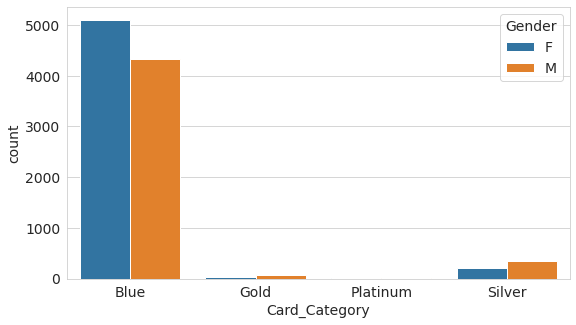

In [ ]:
card_df = bank_churn_df[['Card_Category', 'Gender','Counter']]

# perform groupby
card_df = card_df.groupby(['Card_Category', 'Gender']).agg(count=("Counter", 'sum'))
card_df = card_df.reset_index() 

# plot barplot
sns.barplot(x="Card_Category",
           y="count",
           hue="Gender",
           data=card_df)

In [ ]:
bank_churn_df['Card_Category'][bank_churn_df.Gender == 'M'].value_counts()

Blue        4335
Silver       345
Gold          78
Platinum      11
Name: Card_Category, dtype: int64

**Answer**: We can easily see that male customers like to make use of the blue card

#### Q3: What is the Average Transaction amount and Credit Limit by Gender

In [ ]:
q3 = bank_churn_df[['Gender', 
                    'Total_Trans_Amt', 
                    'Credit_Limit']]
q3 = q3.groupby(['Gender']).agg(avg_trans=("Total_Trans_Amt", 'mean'), 
                                avg_credit_limit=("Credit_Limit", 'mean'))
q3

,avg_trans,avg_credit_limit
Gender,,
F,4324.318216,5023.854274
M,4493.706228,12685.674963


In [ ]:
q3 = q3.reset_index()

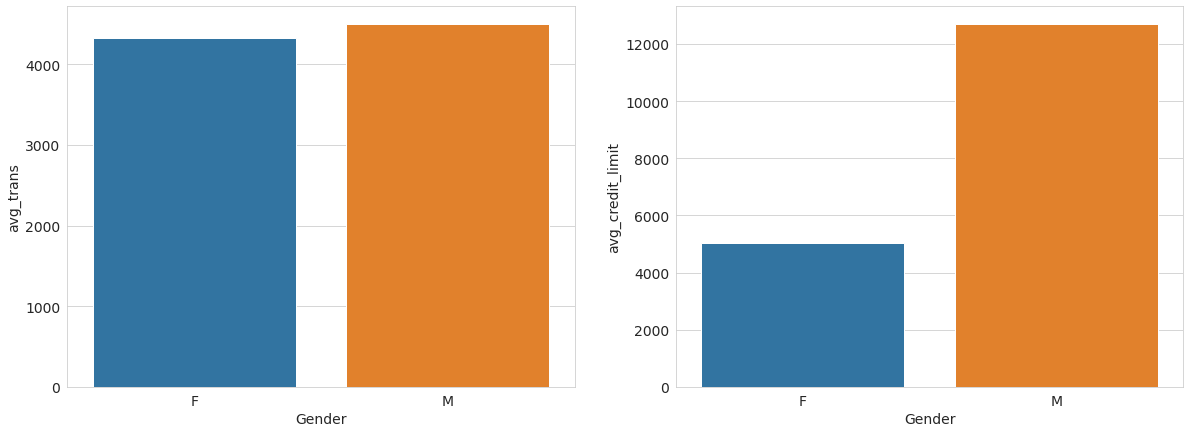

In [227]:
fig, axs = plt.subplots(1,2, figsize=(20, 7))
a = sns.barplot(x="Gender", 
            y="avg_trans",
            data=q3, ax = axs[0]
            )
#a.set_axis_labels("Gender", "Average Transaction Amount ($)")

b = sns.barplot(x="Gender", 
            y="avg_credit_limit",
            data=q3, ax = axs[1]
            )

#b.set_axis_labels("Gender", "Average Credit Limit ($)")

#### Q4: What is the education level of all attrited customers?


In [245]:
q4=bank_churn_df[bank_churn_df.Attrition_Flag == 'Attrited Customer'].groupby('Education_Level').size().sort_values(ascending=False)
print(q4)

Education_Level
Graduate         487
High School      306
Unknown          256
Uneducated       237
College          154
Doctorate         95
Post-Graduate     92
dtype: int64


## Inferences and Conclusion

**TODO** - Write some explanation here: a summary of all the inferences drawn from the analysis, and any conclusions you may have drawn by answering various questions.

In [228]:
import jovian

In [229]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/solomon-ayanlakin/credit-card-churn-analysis


'https://jovian.ai/solomon-ayanlakin/credit-card-churn-analysis'

## References and Future Work

To build upon the credit card exploratory data analysis, I would be building a model to predict credit card churn with up to 90% accuracy. 

By splitting the data into test and train, I can train my written model.

> Submission Instructions (delete this cell)
> 
> - Upload your notebook to your Jovian.ml profile using `jovian.commit`.
> - **Make a submission here**: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
> - Share your work on the forum: https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684
> - Share your work on social media (Twitter, LinkedIn, Telegram etc.) and tag [@JovianML](https://twitter.com/jovianml)
>
> (Optional) Write a blog post
> 
> - A blog post is a great way to present and showcase your work.  
> - Sign up on [Medium.com](https://medium.com) to write a blog post for your project.
> - Copy over the explanations from your Jupyter notebook into your blog post, and [embed code cells & outputs](https://medium.com/jovianml/share-and-embed-jupyter-notebooks-online-with-jovian-ml-df709a03064e)
> - Check out the Jovian.ml Medium publication for inspiration: https://medium.com/jovianml


 

In [230]:
import jovian

In [231]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/solomon-ayanlakin/credit-card-churn-analysis


'https://jovian.ai/solomon-ayanlakin/credit-card-churn-analysis'